In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to check its contents
file_path = '21_22_season.xlsx'
teams_data = pd.read_excel(file_path, sheet_name='Teams')
teams_data

,TAKıM,MAç,MAç TARIHI,DISTANCE COVERED - TOPLAM MESAFE,"DISTANCE COVERED - DISTANCE ON SPEED UP TO 0,2 M/S","DISTANCE COVERED - DISTANCE ON SPEED 0,21 - 2 M/S","DISTANCE COVERED - DISTANCE ON SPEED 2,01 - 4 M/S","DISTANCE COVERED - DISTANCE ON SPEED 4,01 - 5,5 M/S","DISTANCE COVERED - DISTANCE ON SPEED 5,51 - 7 M/S",DISTANCE COVERED - DISTANCE ON SPEED OVER 7 M/S,"DISTANCE COVERED - İVMELENME SAYıSı (5,5 - 7)",DISTANCE COVERED - İVMELENME SAYıSı (>7),DISTANCE COVERED - AZAMI HıZ,MINUTES ON THE FIELD (OPTIONS) всего в атаке,MINUTES ON THE FIELD (OPTIONS) всего в обороне,"BALL IN PLAY, MIN."
0,Besiktas,Besiktas 3:0 Rizespor,13.08.21,1.080200e+05,352.0000,4.194800e+04,4.191400e+04,15743.0,6892.0000,1210.0000,483.0000,82.0000,8.1800,00:24:29,00:26:03,00:50:32
1,Besiktas,Gaziantep FK 0:0 Besiktas,21.08.21,1.118210e+05,394.0000,4.455500e+04,4.030900e+04,17100.0,8140.0000,1338.0000,528.0000,78.0000,8.3200,00:28:17,00:19:50,00:48:07
2,Besiktas,Besiktas 1:0 Fatih Karagumruk,28.08.21,9.802100e+04,409.0000,4.227200e+04,3.477200e+04,13078.0,6621.0000,890.0000,449.0000,53.0000,7.9700,00:16:58,00:28:51,00:45:49
3,Besiktas,Besiktas 3:0 Yeni Malatyaspor,11.09.21,1.112190e+05,383.0000,4.008800e+04,4.379400e+04,18609.0,7153.0000,1195.0000,501.0000,74.0000,8.1400,00:34:58,00:16:45,00:51:43
4,Besiktas,Antalyaspor 2:3 Besiktas,18.09.21,1.123180e+05,419.0000,4.114200e+04,4.418400e+04,17621.0,7573.0000,1431.0000,483.0000,72.0000,8.0900,00:28:23,00:20:43,00:49:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Galatasaray A.S.,Istanbul Basaksehir 0:0 Galatasaray A.S.,07.05.22,1.123630e+05,339.0000,4.036000e+04,4.317800e+04,19306.0,7910.0000,1272.0000,559.0000,85.0000,8.1700,00:22:52,00:36:50,00:59:42
796,Galatasaray A.S.,Galatasaray A.S. 3:2 Adana Demirspor,16.05.22,1.047800e+05,410.0000,4.153200e+04,3.717500e+04,16152.0,7582.0000,1984.0000,488.0000,105.0000,8.1400,00:25:27,00:23:53,00:49:20
797,Galatasaray A.S.,Antalyaspor 1:1 Galatasaray A.S.,20.05.22,1.042110e+05,541.0000,4.109100e+04,3.773900e+04,15799.0,7892.0000,1191.0000,515.0000,74.0000,7.9900,00:27:12,00:20:27,00:47:39
798,Galatasaray A.S.,Ortalama,16.08.21 - 20.05.22,1.117622e+05,384.2895,4.146958e+04,4.171582e+04,18259.5,8138.4737,1818.8684,526.2895,105.3421,8.2779,00:27:14.263000,00:22:44.474000,00:49:58.737000


In [2]:
teams_data.columns = [
    'Team', 'Match', 'Match Date', 'Total Distance Covered', 
    'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s', 
    'Distance Covered Speed 2.01-4 m/s', 'Distance Covered Speed 4.01-5.5 m/s', 
    'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s', 
    'No. of Accelerations 5.5-7 m/s²','No. of Accelerations >7 m/s²',
    'Maximal Speed', 'Minutes on the field total attacking', 
    'Minutes on the field total defending', 'Min ball in play',
]

In [3]:
print("DataFrame Information:")
teams_data.info()
teams_data['Match Date'] = pd.to_datetime(teams_data['Match Date'], format='%d.%m.%y', errors='coerce')


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Team                                  800 non-null    object 
 1   Match                                 800 non-null    object 
 2   Match Date                            800 non-null    object 
 3   Total Distance Covered                800 non-null    float64
 4   Distance Covered Speed 0-0.2 m/s      800 non-null    float64
 5   Distance Covered Speed 0.21-2 m/s     800 non-null    float64
 6   Distance Covered Speed 2.01-4 m/s     800 non-null    float64
 7   Distance Covered Speed 4.01-5.5 m/s   800 non-null    float64
 8   Distance Covered Speed 5.51-7 m/s     800 non-null    float64
 9   Distance Covered Speed >7 m/s         800 non-null    float64
 10  No. of Accelerations 5.5-7 m/s²       800 non-null    float64
 

In [4]:
print("\nSummary Statistics:")
print(teams_data.describe())


Summary Statistics:
                          Match Date  Total Distance Covered  \
count                            760            8.000000e+02   
mean   2022-01-02 21:47:22.105263360            2.177982e+05   
min              2021-08-13 00:00:00            8.914100e+04   
25%              2021-10-23 18:00:00            1.104670e+05   
50%              2022-01-01 12:00:00            1.135470e+05   
75%              2022-03-13 00:00:00            1.167048e+05   
max              2022-05-22 00:00:00            4.537688e+06   
std                              NaN            6.541849e+05   

       Distance Covered Speed 0-0.2 m/s  Distance Covered Speed 0.21-2 m/s  \
count                        800.000000                       8.000000e+02   
mean                         681.282829                       7.931031e+04   
min                          209.000000                       3.375600e+04   
25%                          309.000000                       4.015375e+04   
50%         

In [5]:
teams_data = teams_data[~teams_data['Match'].str.contains("On average|Total")] # we don't need it anymore

def convert_to_minutes(time_str):
    if pd.isnull(time_str) or time_str == "":
        return None
    # Ensure the time string is in string format
    time_str = str(time_str)
    # Convert to timedelta and then to total seconds, and finally to minutes
    td = pd.to_timedelta(time_str)
    return td.total_seconds() / 60



# Apply the conversion function to your time columns
teams_data['Minutes on the field total attacking'] = teams_data['Minutes on the field total attacking'].apply(convert_to_minutes)
teams_data['Minutes on the field total defending'] = teams_data['Minutes on the field total defending'].apply(convert_to_minutes)
teams_data['Min ball in play'] = teams_data['Min ball in play'].apply(convert_to_minutes)

In [6]:
print("\nMissing Values:")
print(teams_data.isnull().sum())
teams_data = teams_data[~teams_data['Match'].str.contains("On average|Total")] 
# I forgot to remove these


Missing Values:
Team                                     0
Match                                    0
Match Date                              40
Total Distance Covered                   0
Distance Covered Speed 0-0.2 m/s         0
Distance Covered Speed 0.21-2 m/s        0
Distance Covered Speed 2.01-4 m/s        0
Distance Covered Speed 4.01-5.5 m/s      0
Distance Covered Speed 5.51-7 m/s        0
Distance Covered Speed >7 m/s            0
No. of Accelerations 5.5-7 m/s²          0
No. of Accelerations >7 m/s²             0
Maximal Speed                            0
Minutes on the field total attacking     0
Minutes on the field total defending     0
Min ball in play                        20
dtype: int64


In [7]:
numerical_cols = teams_data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Total Distance Covered', 'Distance Covered Speed 0-0.2 m/s',
       'Distance Covered Speed 0.21-2 m/s',
       'Distance Covered Speed 2.01-4 m/s',
       'Distance Covered Speed 4.01-5.5 m/s',
       'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
       'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²',
       'Maximal Speed', 'Minutes on the field total attacking',
       'Minutes on the field total defending', 'Min ball in play'],
      dtype='object')

In [8]:
import plotly.express as px
import plotly.io as pio
import re
def sanitize_filename(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

# Generate interactive plots for each numerical column and save them as HTML
for col in numerical_cols:
    fig = px.line(
        teams_data, 
        x='Match Date', 
        y=col, 
        color='Team', 
        title=f'{col} Over Time',
        labels={
            'Match Date': 'Match Date',
            col: col
        }
    )
    fig.update_layout(xaxis_title='Match Date', yaxis_title=col)
    # Sanitize the file name
    sanitized_filename = sanitize_filename(f'{col}_over_time.html')
    # Save each plot as an HTML file
    pio.write_html(fig, file=sanitized_filename, auto_open=True)

print("Plots have been saved as HTML files.")



Plots have been saved as HTML files.


In [9]:
unique_teams = teams_data['Team'].unique()
print("Unique team names in the dataset:")
print(unique_teams)


Unique team names in the dataset:
['Besiktas' 'Rizespor' 'Fatih Karagumruk' 'Gaziantep FK' 'Altay SK'
 'Kayserispor' 'Hatayspor' 'Kasimpasa' 'Istanbul Basaksehir' 'Alanyaspor'
 'Antalyaspor' 'Goztepe' 'Adana Demirspor' 'Fenerbahce' 'Yeni Malatyaspor'
 'Trabzonspor' 'Sivasspor' 'Konyaspor' 'Giresunspor' 'Galatasaray A.S.']


In [10]:
import os
import numpy as np
teams_data['Team'] = teams_data['Team'].str.strip().str.title()

ranking = [
    'Trabzonspor', 'Fenerbahçe', 'Konyaspor', 'Basaksehir',
    'Alanyaspor', 'Besiktas', 'Antalyaspor', 'Fatih Karagümrük',
    'Adana Demirspor', 'Sivasspor', 'Kasimpasa', 'Hatayspor',
    'Galatasaray', 'Kayserispor', 'Gaziantep Fk', 'Giresunspor',
    'Caykur rizespor', 'Altay', 'Goztepe', 'Yeni Malatyaspor'
]



# Divide the teams into 4 groups as evenly as possible
num_groups = 4
group_size = int(np.ceil(len(ranking) / num_groups))
groups = [ranking[i:i + group_size] for i in range(0, len(ranking), group_size)]

# Directory to save the plots
output_dir = 'team_plots_over_time_21_22'
os.makedirs(output_dir, exist_ok=True)

# Generate static plots for each group
for group_idx, group in enumerate(groups):
    group_dir = os.path.join(output_dir, f'Group_{group_idx + 1}')
    os.makedirs(group_dir, exist_ok=True)
    
    group_data = teams_data[teams_data['Team'].isin(group)]
    
    for col in numerical_cols:
        plt.figure(figsize=(15, 8))
        has_data = False
        for team in group:
            team_data = group_data[group_data['Team'] == team]
            if not team_data.empty:  # Ensure there is data to plot
                plt.plot(team_data['Match Date'], team_data[col], label=team)
                has_data = True
        
        if has_data:
            plt.title(f'{col} Over Time - Group {group_idx + 1}')
            plt.xlabel('Match Date')
            plt.ylabel(col)
            plt.legend()
            plt.xticks(rotation=45)
            # Save each plot as an image file
            sanitized_col = re.sub(r'[\\/*?:"<>|]', "", col)
            plt.savefig(os.path.join(group_dir, f'{sanitized_col}.png'))
            plt.close()
        else:
            print(f"No data available for {col} in Group {group_idx + 1}")

print(f"Plots have been saved in the '{output_dir}' directory.")


Plots have been saved in the 'team_plots_over_time_21_22' directory.


In [12]:
file_path = 'Final_dataset_21_22.xlsx'
Final_dataset = pd.read_excel(file_path)
Final_dataset.columns
Final_dataset = Final_dataset[~Final_dataset['Match'].str.contains("On average|Total")] 

In [13]:
Final_dataset.columns

Index(['Unnamed: 0', 'Team', 'Match', 'Match Date', 'Total Distance Covered',
       'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s',
       'Distance Covered Speed 2.01-4 m/s',
       'Distance Covered Speed 4.01-5.5 m/s',
       'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
       'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²',
       'Maximal Speed', 'Home Team', 'Home Score', 'Away Team', 'Away Score',
       'Cumulative Points', 'Cumulative Goal Difference',
       'Cumulative Goals Scored', 'Cumulative Goals Conceded',
       'Cumulative Wins', 'Cumulative Losses', 'Cumulative Ties',
       'Current Form Points', 'Current Form Goal Difference',
       'Current Form Goals Scored', 'Current Form Goals Conceded',
       'Current Form Wins', 'Current Form Losses', 'Current Form Ties',
       'High Speed Runs Attacking', 'High Speed Runs Defensive',
       'Sprints Attacking', 'Sprints Defensive', 'Home/Away', 'Goals S

In [14]:
print("\nMissing Values:")
print(Final_dataset.isnull().sum())


Missing Values:
Unnamed: 0                              0
Team                                    0
Match                                   0
Match Date                              0
Total Distance Covered                  0
Distance Covered Speed 0-0.2 m/s        0
Distance Covered Speed 0.21-2 m/s       0
Distance Covered Speed 2.01-4 m/s       0
Distance Covered Speed 4.01-5.5 m/s     0
Distance Covered Speed 5.51-7 m/s       0
Distance Covered Speed >7 m/s           0
No. of Accelerations 5.5-7 m/s²         0
No. of Accelerations >7 m/s²            0
Maximal Speed                           0
Home Team                               0
Home Score                              0
Away Team                               0
Away Score                              0
Cumulative Points                       0
Cumulative Goal Difference              0
Cumulative Goals Scored                 0
Cumulative Goals Conceded               0
Cumulative Wins                         0
Cumulative Losses

Before applying a model for a classification task, I always use PCA to have a hint about the distribution of the target variable and how my indipendent variables are able to classify it

Before the cluster we use the Hopkins statistic to see if it's worth to try clustering, a value near to 0.5 indicates a normal distribution while a value near to either 0 or 1 indicates possibility of clusters.

In [29]:
# credit for the code goes to https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency/blob/master/Hopkins-Statistic-Clustering-Tendency.ipynb 
import numpy as np
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

features = [
    'Total Distance Covered', 'Distance Covered Speed 0-0.2 m/s',
    'Distance Covered Speed 0.21-2 m/s', 'Distance Covered Speed 2.01-4 m/s',
    'Distance Covered Speed 4.01-5.5 m/s', 'Distance Covered Speed 5.51-7 m/s',
    'Distance Covered Speed >7 m/s', 'No. of Accelerations 5.5-7 m/s²',
    'No. of Accelerations >7 m/s²', 'Maximal Speed',
    'High Speed Runs Attacking', 'High Speed Runs Defensive',
    'Sprints Attacking', 'Sprints Defensive'
]
hopkins_statistic(Final_dataset[features])

0.8829584622640888

Value is good, it's worth to make further analysis

In [18]:
Final_dataset = Final_dataset.drop_duplicates(subset=['Match'], keep='first')
Final_dataset

,Unnamed: 0,Team,Match,Match Date,Total Distance Covered,Distance Covered Speed 0-0.2 m/s,Distance Covered Speed 0.21-2 m/s,Distance Covered Speed 2.01-4 m/s,Distance Covered Speed 4.01-5.5 m/s,Distance Covered Speed 5.51-7 m/s,...,Goals Scored,Goals Conceded,Goal Difference,Result,season,Promoted_from_20_21_home,Promoted_from_20_21_away,Minutes on the field total attacking,Minutes on the field total defending,Min ball in play
0,0,Besiktas,Besiktas 3:0 Rizespor,13.08.21,108020,352,41948,41914,15743,6892,...,3,0,3,Win,2022,0,0,00:24:29,00:26:03,00:50:32
1,1,Besiktas,Gaziantep FK 0:0 Besiktas,21.08.21,111821,394,44555,40309,17100,8140,...,0,0,0,Tie,2022,0,0,00:28:17,00:19:50,00:48:07
2,2,Besiktas,Besiktas 1:0 Fatih Karagumruk,28.08.21,98021,409,42272,34772,13078,6621,...,1,0,1,Win,2022,0,0,00:16:58,00:28:51,00:45:49
3,3,Besiktas,Besiktas 3:0 Yeni Malatyaspor,11.09.21,111219,383,40088,43794,18609,7153,...,3,0,3,Win,2022,0,0,00:34:58,00:16:45,00:51:43
4,4,Besiktas,Antalyaspor 2:3 Besiktas,18.09.21,112318,419,41142,44184,17621,7573,...,3,2,1,Win,2022,0,0,00:28:23,00:20:43,00:49:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,688,Konyaspor,Galatasaray A.S. 1:0 Konyaspor,17.10.21,114098,287,42115,41849,20030,8203,...,0,1,-1,Lose,2022,0,0,00:27:46,00:21:57,00:49:43
668,702,Konyaspor,Konyaspor 1:0 Giresunspor,04.02.22,116274,261,41767,45893,18635,8010,...,1,0,1,Win,2022,0,1,00:27:58,00:23:18,00:51:16
673,707,Konyaspor,Konyaspor 2:0 Galatasaray A.S.,05.03.22,118041,363,42987,46464,18356,7959,...,2,0,2,Win,2022,0,0,00:25:19,00:30:12,00:55:31
684,720,Giresunspor,Giresunspor 0:2 Galatasaray A.S.,16.08.21,110213,317,38439,41946,19351,8551,...,0,2,-2,Lose,2022,1,0,00:18:38,00:34:05,00:52:43


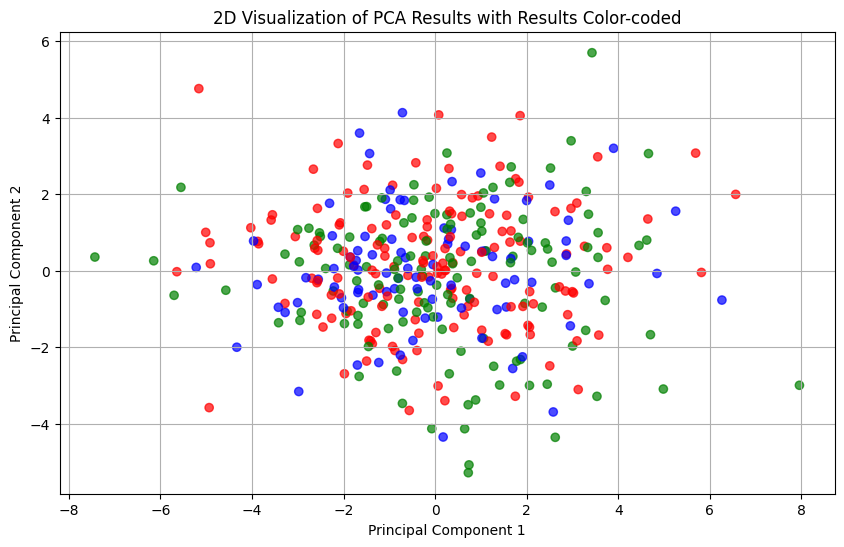

In [19]:
from sklearn.decomposition import PCA
import pandas as pd

X = Final_dataset[features]

# Standardize the features
X_standardized = (X - X.mean()) / X.std()  

# Perform PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Color points by result
result_colors = {'Win': 'green', 'Lose': 'red', 'Tie': 'blue'}
colors = Final_dataset['Result'].map(result_colors)

# Plot the combined PCA results with colors
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=colors, alpha=0.7)
plt.title('2D Visualization of PCA Results with Results Color-coded')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Results are really bad

Let's try to change the Principal Component into an overall explanation of the kinematic measures (PC1) and sprint measures (PC2)

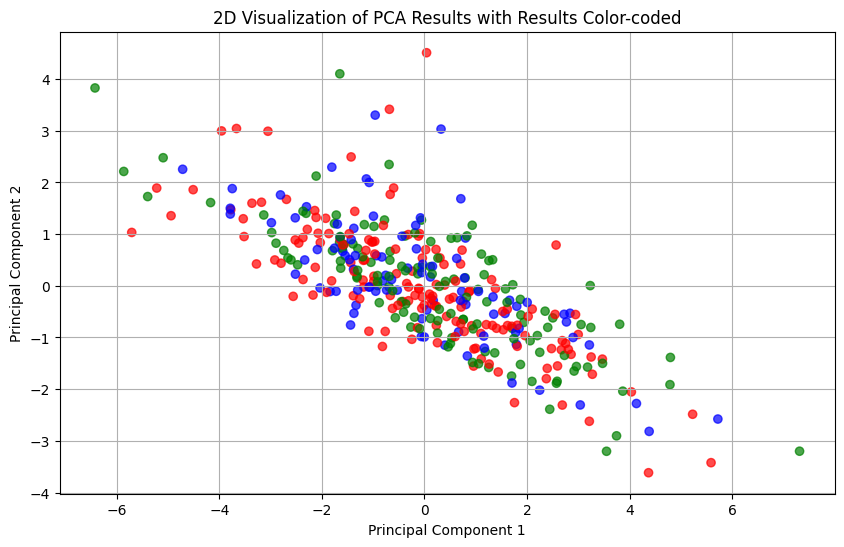

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

# Extract the features for PCA
features_pca1 = [
    'Total Distance Covered', 'Distance Covered Speed 0-0.2 m/s',
    'Distance Covered Speed 0.21-2 m/s', 'Distance Covered Speed 2.01-4 m/s',
    'Distance Covered Speed 4.01-5.5 m/s', 'Distance Covered Speed 5.51-7 m/s',
    'Distance Covered Speed >7 m/s', 'No. of Accelerations 5.5-7 m/s²',
    'No. of Accelerations >7 m/s²', 'Maximal Speed'
]

features_pca2 = [
    'High Speed Runs Attacking', 'High Speed Runs Defensive',
    'Sprints Attacking', 'Sprints Defensive'
]
Final_dataset[features_pca2] = Final_dataset[features_pca2].fillna(Final_dataset[features_pca2].mean())

# Standardize the features
scaled_data_pca1 = StandardScaler().fit_transform(Final_dataset[features_pca1])
scaled_data_pca2 = StandardScaler().fit_transform(Final_dataset[features_pca2])

# Perform PCA
pca1 = PCA(n_components=1)
principal_components_pca1 = pca1.fit_transform(scaled_data_pca1)

pca2 = PCA(n_components=1)
principal_components_pca2 = pca2.fit_transform(scaled_data_pca2)

# Combine the results into a single DataFrame for 2D plotting
df_combined_pca = pd.DataFrame({
    'PC1': principal_components_pca1.flatten(),
    'PC2': principal_components_pca2.flatten()
})

# Map results to colors
result_colors = {'Win': 'green', 'Lose': 'red', 'Tie': 'blue'}
colors = Final_dataset['Result'].map(result_colors)

# Plot the combined PCA results with colors
plt.figure(figsize=(10, 6))
plt.scatter(df_combined_pca['PC1'], df_combined_pca['PC2'], c=colors, alpha=0.7)
plt.title('2D Visualization of PCA Results with Results Color-coded')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



Interpretation:

Lack of Clear Clusters: The overlapping colors suggest that the physical performance metrics (distances covered at various speeds, accelerations, etc.) may not be the dominant factors determining the match outcomes. Other factors, like tactics, individual player performances, or external conditions, might play a more significant role.

Potential Overlap: The points are densely packed in some regions, indicating matches with similar physical performance metrics but different outcomes, highlighting the complexity and multifaceted nature of soccer matches.

We try to use TSNE that is non linear and usually it outperform PCA

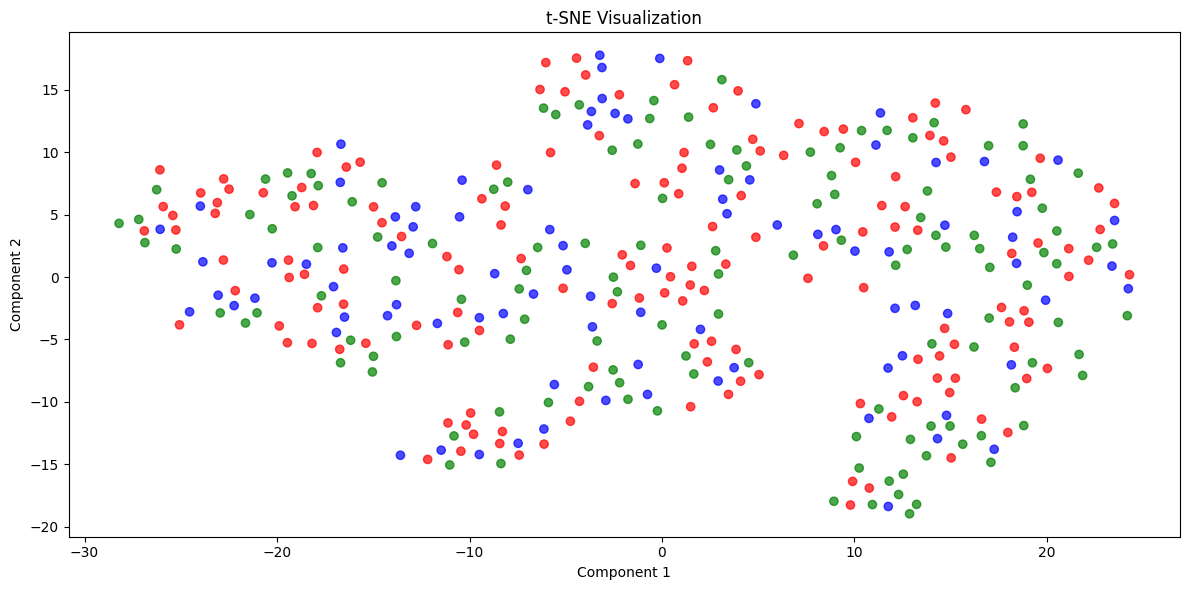

In [22]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(principal_df)

# Plot t-SNE results
result_colors = {'Win': 'green', 'Lose': 'red', 'Tie': 'blue'}
colors = Final_dataset['Result'].map(result_colors)

# Plot t-SNE results
plt.figure(figsize=(12, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()


Interpretation:

The points are spread across the plot without clear, distinct clusters for each team. This suggests that the features used (distances covered at various speeds, accelerations, etc.) do not strongly differentiate the teams in a way that t-SNE can easily separate.

The overlap in colors indicates that teams have similar performance metrics, making it challenging to distinguish them purely based on the selected physical performance features.

We try every possible method of clustering, we are using Partitioning (KMeans), Hierarchial (AgglomerativeClustering), Density Based (DBSCAN) and GaussianMixture

Instead of just plotting it randomly we printed the statistical measures regarding the ability to cluster

We start by the one where the number of clusters is a tunable parameter

In [24]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Initialize an empty list to store clustering scores
clustering_scores = []

# Assuming Final_dataset is your dataset and features is the list of features you want to use
scaled_features = StandardScaler().fit_transform(Final_dataset[features])


# Try different numbers of clusters and evaluate
cluster_range = range(2, 21)  # Trying cluster sizes from 2 to 20

for n_clusters in cluster_range:
    # KMeans Clustering
    kmeans_clustering = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans_clustering.fit_predict(scaled_features)
    row = {
        'Method': 'KMeans',
        'Number of Clusters': n_clusters,
        'Silhouette Score': silhouette_score(scaled_features, kmeans_labels),
        'Davies-Bouldin Index': davies_bouldin_score(scaled_features, kmeans_labels)
    }
    clustering_scores.append(row.copy())

    # Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(scaled_features)
    row['Method'] = 'Agglomerative'
    row['Silhouette Score'] = silhouette_score(scaled_features, agg_labels)
    row['Davies-Bouldin Index'] = davies_bouldin_score(scaled_features, agg_labels)
    clustering_scores.append(row.copy())

    # Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=n_clusters)
    gmm_labels = gmm.fit_predict(scaled_features)
    if len(set(gmm_labels)) > 1:  # Silhouette score requires at least 2 clusters
        row['Method'] = 'GMM'
        row['Silhouette Score'] = silhouette_score(scaled_features, gmm_labels)
        row['Davies-Bouldin Index'] = davies_bouldin_score(scaled_features, gmm_labels)
        clustering_scores.append(row.copy())

# Convert the list of dictionaries to a DataFrame
clustering_scores_df = pd.DataFrame(clustering_scores)

print(clustering_scores_df)


           Method  Number of Clusters  Silhouette Score  Davies-Bouldin Index
0          KMeans                   2          0.193838              1.741507
1   Agglomerative                   2          0.163376              1.938419
2             GMM                   2          0.140284              3.009474
3          KMeans                   3          0.128796              2.101368
4   Agglomerative                   3          0.148357              1.768849
5             GMM                   3          0.074331              2.867862
6          KMeans                   4          0.134169              1.798381
7   Agglomerative                   4          0.136606              1.687098
8             GMM                   4          0.082392              2.756121
9          KMeans                   5          0.112820              1.939014
10  Agglomerative                   5          0.100824              1.864702
11            GMM                   5          0.031354         

DBSCAN will found clusters by himself

In [25]:
# Function to perform DBSCAN with different eps values
def evaluate_dbscan(eps_values, min_samples):
    results = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        
        # Ensure there are at least 2 clusters
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(scaled_features, labels)
            davies_bouldin_avg = davies_bouldin_score(scaled_features, labels)
            results.append((eps, silhouette_avg, davies_bouldin_avg, len(set(labels))))
        else:
            results.append((eps, None, None, len(set(labels))))
    return results

# Define a range of eps values to try
eps_values = np.linspace(0.1, 1.0, 10)
min_samples = 5

# Evaluate DBSCAN with the different eps values
dbscan_results = evaluate_dbscan(eps_values, min_samples)

# Convert results to DataFrame for display
dbscan_results_df = pd.DataFrame(dbscan_results, columns=['eps', 'Silhouette Score', 'Davies-Bouldin Index', 'Number of Clusters'])

dbscan_results_df



,eps,Silhouette Score,Davies-Bouldin Index,Number of Clusters
0,0.1,None,None,1
1,0.2,None,None,1
2,0.3,None,None,1
3,0.4,None,None,1
4,0.5,None,None,1
5,0.6,None,None,1
6,0.7,None,None,1
7,0.8,None,None,1
8,0.9,None,None,1
9,1.0,None,None,1


The DBSCAN algorithm with the tested eps values did not find more than one cluster in the dataset. This indicates that the data might not have the density-based structure that DBSCAN is designed to detect, or that the eps values are not suitable for this dataset.

eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function. Default value is 0.5

In [26]:
# Define a larger range of eps values to try
eps_values_large = np.linspace(1.0, 5.0, 10)

# Evaluate DBSCAN with the larger eps values
dbscan_results_large = evaluate_dbscan(eps_values_large, min_samples)

# Convert results to DataFrame for display
dbscan_results_large_df = pd.DataFrame(dbscan_results_large, columns=['eps', 'Silhouette Score', 'Davies-Bouldin Index', 'Number of Clusters'])


dbscan_results_large_df


,eps,Silhouette Score,Davies-Bouldin Index,Number of Clusters
0,1.000000,NaN,NaN,1
1,1.444444,NaN,NaN,1
2,1.888889,-0.149297,4.698777,4
3,2.333333,0.156226,16.240741,2
4,2.777778,0.266685,12.815370,2
5,3.222222,0.336169,6.072595,2
6,3.666667,0.405349,4.376470,2
7,4.111111,0.404310,2.905494,2
8,4.555556,0.416817,0.427082,2
9,5.000000,NaN,NaN,1
